In [ ]:
import pandas as pd
import numpy as np
cleaned_data = pd.read_csv('startups_data_cleaned_step1.csv')

In [ ]:
cleaned_data

,name,market,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,...,round_C,round_D,round_E,round_F,round_G,round_H,category_count,clean_name,is_operating,category_updated
0,Le HerbÈ,Medical Marijuana Patients,100000.0,USA,WA,Seattle,Seattle,1,2014-12-01,12,...,0,0,0,0,0,0,3,le herbè,1,Healthcare
1,Kandid,Apps,1400000.0,USA,CA,SF Bay Area,San Francisco,1,2014-11-19,11,...,0,0,0,0,0,0,1,kandid,1,Technology
2,The Manly Man Can,Fashion,30.0,USA,MI,Detroit,Pinckney,1,2014-10-26,10,...,0,0,0,0,0,0,1,the manly man can,1,Fashion & Lifestyle
3,MyKidsCalendar,Software,110000.0,USA,NJ,Newark,Long Valley,1,2014-10-22,10,...,0,0,0,0,0,0,1,mykidscalendar,1,Technology
4,Peach,Fashion,500000.0,USA,CA,SF Bay Area,Berkeley,1,2014-10-19,10,...,0,0,0,0,0,0,3,peach,1,Fashion & Lifestyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12301,eBay,Business Services,6700000.0,USA,CA,SF Bay Area,San Jose,1,1995-09-01,9,...,0,0,0,0,0,0,6,ebay,1,Business Services
12302,Arkansas Children's Hospital,Biotechnology,3500000.0,USA,AR,Little Rock,Little Rock,1,2012-01-01,1,...,0,0,0,0,0,0,1,arkansas children's hospital,1,Healthcare
12303,Northcentral Technical College,Education,6200000.0,USA,WI,WI - Other,Antigo,1,2012-01-01,1,...,0,0,0,0,0,0,1,northcentral technical college,1,Education
12304,EATON,Automotive,2400000.0,USA,OH,Cleveland,Cleveland,1,2011-01-01,1,...,0,0,0,0,0,0,3,eaton,0,Transport & Automotive


In [ ]:
print(cleaned_data.columns)

Index(['name', 'market', 'funding_total_usd', 'country_code', 'state_code',
       'region', 'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'category_count', 'clean_name', 'is_operating', 'category_updated'],
      dtype='object')


In [ ]:
cleaned_data.dtypes

name                     object
market                   object
funding_total_usd       float64
country_code             object
state_code               object
region                   object
city                     object
funding_rounds            int64
founded_at               object
founded_month             int64
founded_quarter           int64
founded_year              int64
first_funding_at         object
last_funding_at          object
seed                      int64
venture                   int64
equity_crowdfunding       int64
undisclosed               int64
convertible_note          int64
debt_financing            int64
angel                     int64
grant                     int64
private_equity            int64
post_ipo_equity           int64
post_ipo_debt             int64
secondary_market          int64
product_crowdfunding      int64
round_A                   int64
round_B                   int64
round_C                   int64
round_D                   int64
round_E 

In [ ]:
df_processed = cleaned_data.copy()

# Convert date columns to datetime
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
for col in date_columns:
    df_processed[col] = pd.to_datetime(df_processed[col])

In [ ]:
#temporal features
df_processed['days_to_first_funding'] = (df_processed['first_funding_at'] - df_processed['founded_at']).dt.days
df_processed['funding_duration'] = (df_processed['last_funding_at'] - df_processed['first_funding_at']).dt.days
df_processed['company_age'] = (pd.Timestamp('2024-01-01') - df_processed['founded_at']).dt.days

In [ ]:
#NaN values
df_processed['days_to_first_funding'] = df_processed['days_to_first_funding'].fillna(-1)
df_processed['funding_duration'] = df_processed['funding_duration'].fillna(0)
df_processed['company_age'] = df_processed['company_age'].fillna(-1)

In [ ]:
# Group funding types
df_processed['early_stage_funding'] = df_processed['seed'] + df_processed['angel']
df_processed['growth_stage_funding'] = df_processed['round_A'] + df_processed['round_B']
df_processed['late_stage_funding'] = df_processed['round_C'] + df_processed['round_D']

In [ ]:
count_round_E = cleaned_data[cleaned_data['round_E'] == 0].shape[0]
print(f"Number of rows where 'round_E' is 0: {count_round_E}")

count_round_F = cleaned_data[cleaned_data['round_F'] == 0].shape[0]
print(f"Number of rows where 'round_F' is 0: {count_round_F}")

count_round_G = cleaned_data[cleaned_data['round_G'] == 0].shape[0]
print(f"Number of rows where 'round_G' is 0: {count_round_E}")

count_round_H = cleaned_data[cleaned_data['round_H'] == 0].shape[0]
print(f"Number of rows where 'round_H' is 0: {count_round_E}")


Number of rows where 'round_E' is 0: 12229
Number of rows where 'round_F' is 0: 12283
Number of rows where 'round_G' is 0: 12229
Number of rows where 'round_H' is 0: 12229


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#seleected features
selected_features = [
    'funding_total_usd',
    'funding_rounds',
    'days_to_first_funding',
    'funding_duration',
    'early_stage_funding',
    'growth_stage_funding',
    'late_stage_funding',
    'category_count'
]

#encoding
categorical_features = ['category_updated', 'state_code']
le = LabelEncoder()
for feature in categorical_features:
    df_processed[feature + '_encoded'] = le.fit_transform(df_processed[feature])

#combining
feature_columns = selected_features + [f + '_encoded' for f in categorical_features]

X = df_processed[feature_columns]
y = df_processed['is_operating']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
y_train.info
sum(y_train)

8235

## First RF model with grid-search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV

#parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': [{0: 5, 1: 1}, 'balanced']
}

#GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2
)

#fitting
print("Tuning hyperparameters...")
grid_search.fit(X_train, y_train)

#best model
best_rf_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

print("Training with the best parameters...")

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print('Feature Importances:')
print(feature_importance_df)

Tuning hyperparameters...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END class_weight={0: 5, 1: 1}, max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END class_weight={0: 5, 1: 1}, max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END class_weight={0: 5, 1: 1}, max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END class_weight={0: 5, 1: 1}, max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END class_weight={0: 5, 1: 1}, max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END class_weight={0: 5, 1: 1}, max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END class_weight={0: 5, 1: 1}, max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END class_weight={0: 5, 1: 1}, max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END class_weight={0: 5, 1: 1}, max_depth=10

The model achieves a high overall accuracy of 83.5% but shows significant class imbalance issues. For Class 0 (the minority class), the model only correctly identifies 7% of cases (recall of 0.07), and when it predicts Class 0, it's right less than half the time (precision of 0.47). This means out of 403 actual Class 0 cases, it only correctly identified 28 while misclassifying 375 as Class 1.
In contrast, for Class 1 (the majority class), the model shows excellent performance with 98% recall and 84% precision. Out of 2059 actual Class 1 cases, it correctly identified 2027 while only misclassifying 32 as Class 0. This stark difference in performance (7% vs 98% recall) indicates a strong bias toward predicting the majority class, despite using balanced class weights in the model's configuration.

## Using SMOTE to balanced data

We try to use SMOTE to create sythetic samples of the miniority class and then performs hyperparameter tuning.

Training model...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15, 'class_weight': 'balanced'}

Model Evaluation:
-----------------
Accuracy: 0.7510

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.36      0.32       403
           1       0.87      0.83      0.85      2059

    accuracy                           0.75      2462
   macro avg       0.58      0.59      0.59      2462
weighted avg       0.77      0.75      0.76      2462


Confusion Matrix:
[[ 146  257]
 [ 356 1703]]

Top 10 Most Important Features:
                    Feature  Importance       Std
8  category_updated_encoded    0.170055  0.034791
5      growth_stage_funding    0.138994  0.029938
0         funding_total_usd    0.123970  0.019206
2     days_to_first_funding    0.120475  0.012603
7            category_count  

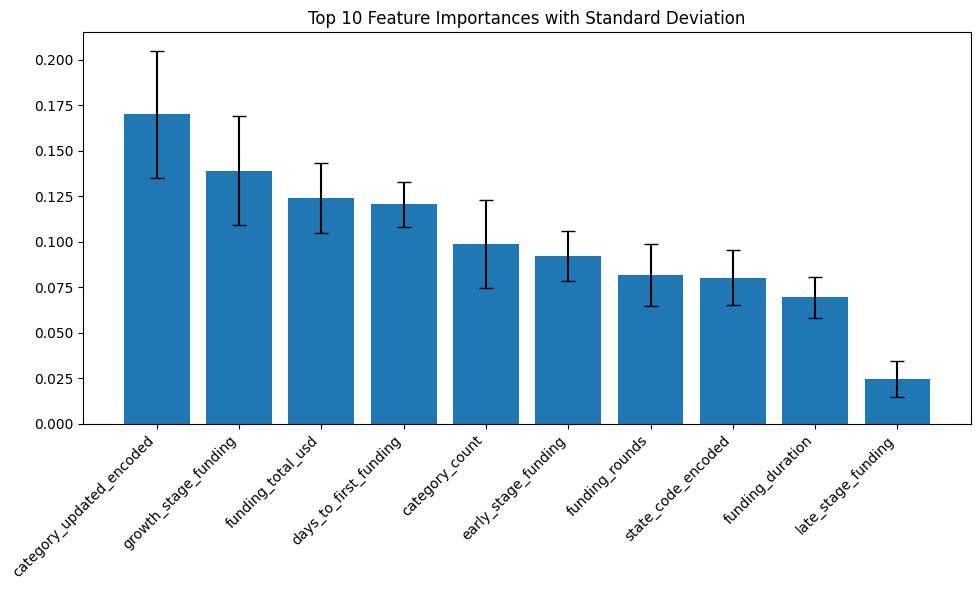


Probability Threshold Analysis:

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.32      0.08      0.13       403
           1       0.84      0.97      0.90      2059

    accuracy                           0.82      2462
   macro avg       0.58      0.52      0.51      2462
weighted avg       0.76      0.82      0.77      2462


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.32      0.23      0.27       403
           1       0.86      0.91      0.88      2059

    accuracy                           0.80      2462
   macro avg       0.59      0.57      0.57      2462
weighted avg       0.77      0.80      0.78      2462


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.29      0.36      0.32       403
           1       0.87      0.83      0.85      2059

    accuracy                           0.75      2462
   macro avg       0.58      0.59      0.59    

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_curve,auc

#apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

#broader hyperparameter grid
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', {0: 3, 1: 1}, {0: 5, 1: 1}]
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

#model with balanced data
print("Training model...")
rf_random.fit(X_train_balanced, y_train_balanced)

best_rf = rf_random.best_estimator_
print("\nBest parameters:", rf_random.best_params_)

y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

print("\nModel Evaluation:")
print("-----------------")
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_], axis=0)

feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances,
    'Std': std
}).sort_values(by='Importance', ascending=False)

print('\nTop 10 Most Important Features:')
print(feature_importance_df.head(10))


def plot_feature_importance(importance_df, top_n=10):
    plt.figure(figsize=(10, 6))
    importance_df = importance_df.head(top_n)
    plt.bar(importance_df['Feature'], importance_df['Importance'])
    plt.errorbar(x=range(len(importance_df)),
                y=importance_df['Importance'],
                yerr=importance_df['Std'],
                fmt='none', color='black', capsize=5)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {top_n} Feature Importances with Standard Deviation')
    plt.tight_layout()
    plt.show()

plot_feature_importance(feature_importance_df)

print("\nProbability Threshold Analysis:")
thresholds = np.arange(0.3, 0.8, 0.1)
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    print(f"\nThreshold: {threshold:.1f}")
    print(classification_report(y_test, y_pred_threshold))

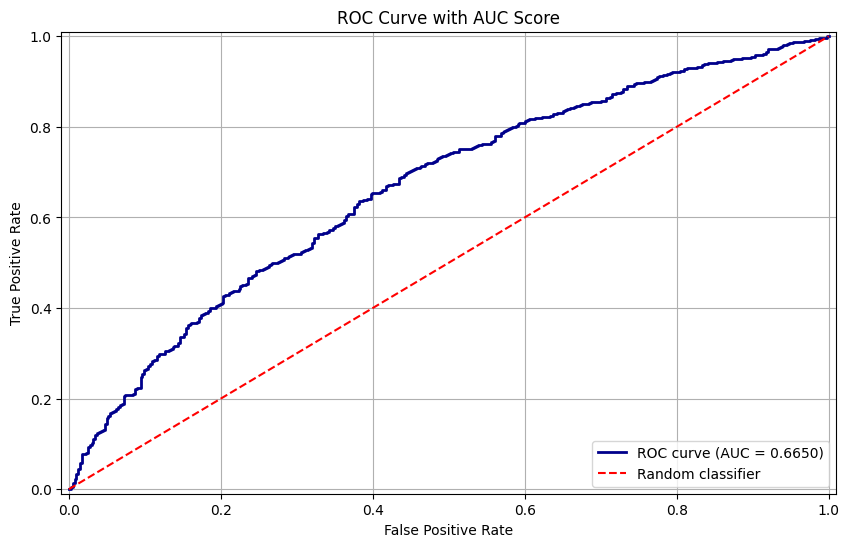


Model Performance Metrics:
------------------------------
AUC Score: 0.6650
Precision: 0.8689
Recall: 0.8271
F1 Score: 0.8475

Confusion Matrix (Counts):
[[ 146  257]
 [ 356 1703]]

Confusion Matrix (Percentages):
True Negatives: 36.23%
False Positives: 63.77%
False Negatives: 17.29%
True Positives: 82.71%


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

#ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob)
auc_score = auc(fpr_rf, tpr_rf)

#plotting
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkblue', lw=2,
         label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random classifier')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC Score')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


metrics_dict = {
    'AUC Score': auc_score,
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

print("\nModel Performance Metrics:")
print("-" * 30)
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")

# Calculate confusion matrix with percentages
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_pct = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

print("\nConfusion Matrix (Counts):")
print(conf_matrix)
print("\nConfusion Matrix (Percentages):")
print("True Negatives: {:.2f}%".format(conf_matrix_pct[0][0] * 100))
print("False Positives: {:.2f}%".format(conf_matrix_pct[0][1] * 100))
print("False Negatives: {:.2f}%".format(conf_matrix_pct[1][0] * 100))
print("True Positives: {:.2f}%".format(conf_matrix_pct[1][1] * 100))

Training model...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 5, 'class_weight': {0: 10, 1: 1}}

Initial Model Evaluation:
-----------------
Accuracy: 0.1751

Initial Classification Report:
              precision    recall  f1-score   support

           0       0.17      1.00      0.28       403
           1       1.00      0.01      0.03      2059

    accuracy                           0.18      2462
   macro avg       0.58      0.51      0.16      2462
weighted avg       0.86      0.18      0.07      2462


Final Results (Threshold = 0.30):
--------------------------------------------------

Confusion Matrix (Counts):
[[ 382   21]
 [1749  310]]

Confusion Matrix (Percentages):
True Negatives: 94.79%
False Positives: 5.21%
False Negatives: 84.94%
True Positives: 15.06%

Final Classification Report:
              precision    recall  f1-scor

/Users/xiaohan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/xiaohan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/xiaohan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/xiaohan/L

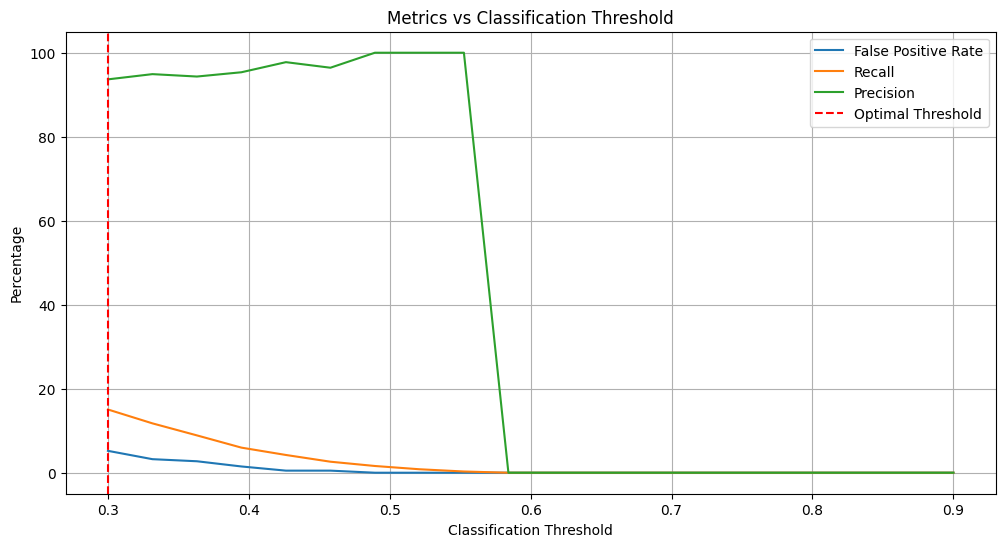

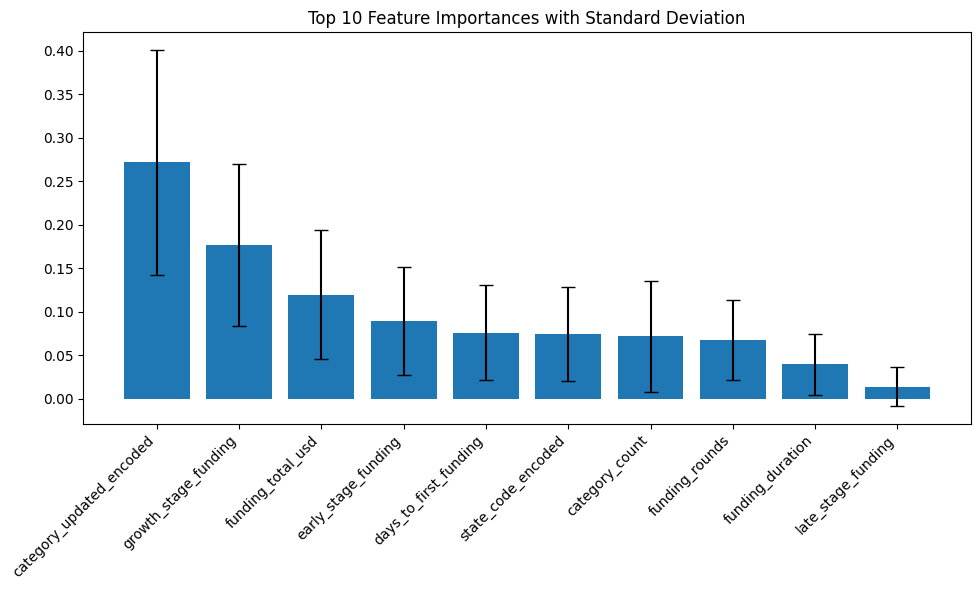

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

#stronger class weights for class 0
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', {0: 5, 1: 1}, {0: 7, 1: 1}, {0: 10, 1: 1}]
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='precision',
    n_jobs=-1,
    random_state=42,
    verbose=1
)


print("Training model...")
rf_random.fit(X_train_balanced, y_train_balanced)

best_rf = rf_random.best_estimator_
print("\nBest parameters:", rf_random.best_params_)

y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

print("\nInitial Model Evaluation:")
print("-----------------")
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('\nInitial Classification Report:')
print(classification_report(y_test, y_pred))

thresholds = np.linspace(0.3, 0.9, 20)
threshold_metrics = []

for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred_threshold)
    conf_matrix_pct = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    threshold_metrics.append({
        'threshold': threshold,
        'precision': precision_score(y_test, y_pred_threshold),
        'recall': recall_score(y_test, y_pred_threshold),
        'f1': f1_score(y_test, y_pred_threshold),
        'fp_rate': conf_matrix_pct[0][1] * 100,
        'tp_rate': conf_matrix_pct[1][1] * 100
    })

metrics_df = pd.DataFrame(threshold_metrics)
optimal_threshold = metrics_df[metrics_df['fp_rate'] < 40].iloc[0]['threshold']

y_pred_final = (y_prob >= optimal_threshold).astype(int)

conf_matrix_final = confusion_matrix(y_test, y_pred_final)
conf_matrix_pct_final = conf_matrix_final.astype('float') / conf_matrix_final.sum(axis=1)[:, np.newaxis]

print(f"\nFinal Results (Threshold = {optimal_threshold:.2f}):")
print("-" * 50)
print("\nConfusion Matrix (Counts):")
print(conf_matrix_final)
print("\nConfusion Matrix (Percentages):")
print(f"True Negatives: {conf_matrix_pct_final[0][0]*100:.2f}%")
print(f"False Positives: {conf_matrix_pct_final[0][1]*100:.2f}%")
print(f"False Negatives: {conf_matrix_pct_final[1][0]*100:.2f}%")
print(f"True Positives: {conf_matrix_pct_final[1][1]*100:.2f}%")

print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))

# Plot metrics vs threshold
plt.figure(figsize=(12, 6))
plt.plot(metrics_df['threshold'], metrics_df['fp_rate'], label='False Positive Rate')
plt.plot(metrics_df['threshold'], metrics_df['recall'] * 100, label='Recall')
plt.plot(metrics_df['threshold'], metrics_df['precision'] * 100, label='Precision')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label='Optimal Threshold')
plt.xlabel('Classification Threshold')
plt.ylabel('Percentage')
plt.title('Metrics vs Classification Threshold')
plt.legend()
plt.grid(True)
plt.show()

importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_], axis=0)

feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances,
    'Std': std
}).sort_values(by='Importance', ascending=False)

plot_feature_importance(feature_importance_df)

Training model...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 5, 'class_weight': {0: 10, 1: 1}}

Performing cross-validation on best model...

Cross-Validation Results:
--------------------------------------------------

Accuracy:
Training - Mean: 0.510 (±0.002)
Validation - Mean: 0.509 (±0.006)

Precision:
Training - Mean: 1.000 (±0.000)
Validation - Mean: 0.979 (±0.038)

Recall:
Training - Mean: 0.021 (±0.005)
Validation - Mean: 0.019 (±0.012)

F1:
Training - Mean: 0.041 (±0.009)
Validation - Mean: 0.037 (±0.024)


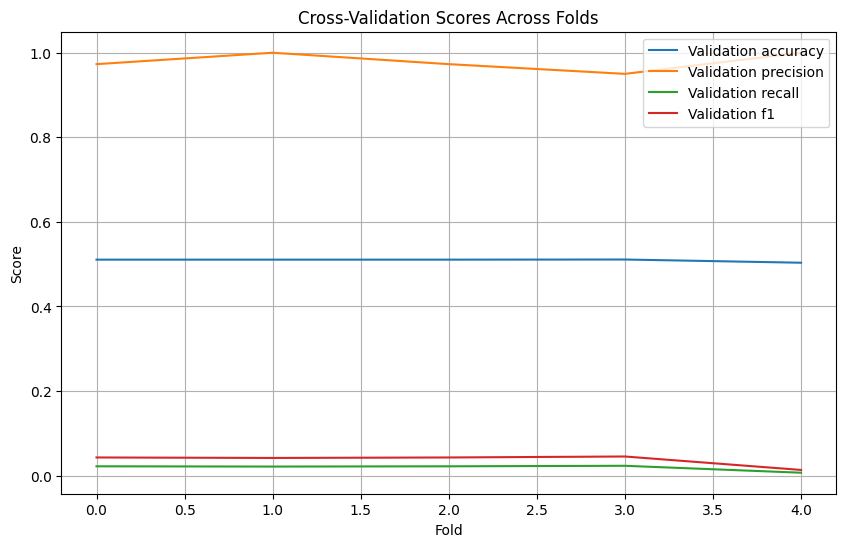


Initial Model Evaluation:
-----------------
Accuracy: 0.1751

Initial Classification Report:
              precision    recall  f1-score   support

           0       0.17      1.00      0.28       403
           1       1.00      0.01      0.03      2059

    accuracy                           0.18      2462
   macro avg       0.58      0.51      0.16      2462
weighted avg       0.86      0.18      0.07      2462


Final Results (Threshold = 0.30):
--------------------------------------------------

Confusion Matrix (Counts):
[[ 382   21]
 [1749  310]]

Confusion Matrix (Percentages):
True Negatives: 94.79%
False Positives: 5.21%
False Negatives: 84.94%
True Positives: 15.06%

Final Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.95      0.30       403
           1       0.94      0.15      0.26      2059

    accuracy                           0.28      2462
   macro avg       0.56      0.55      0.28      2462
weighted a

/Users/xiaohan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/xiaohan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/xiaohan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/xiaohan/L

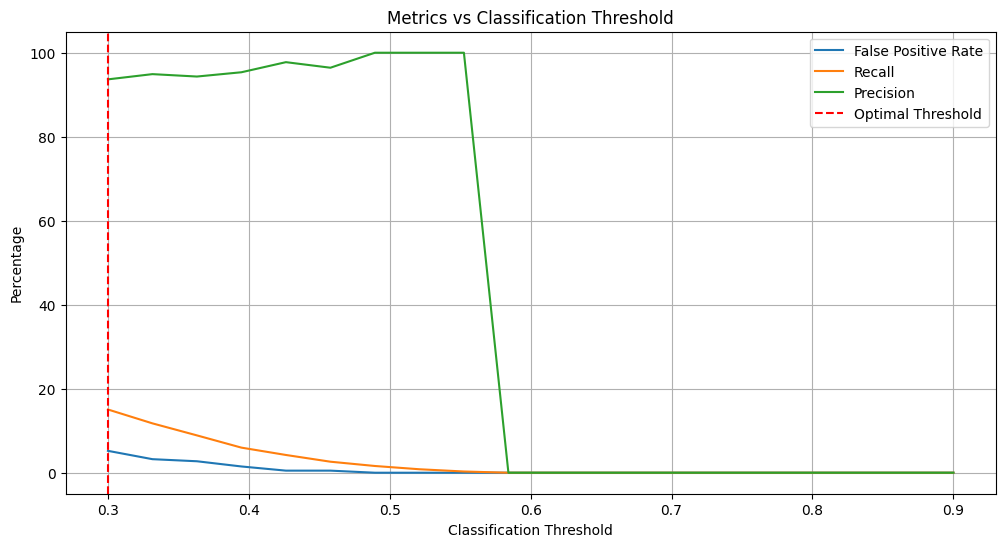

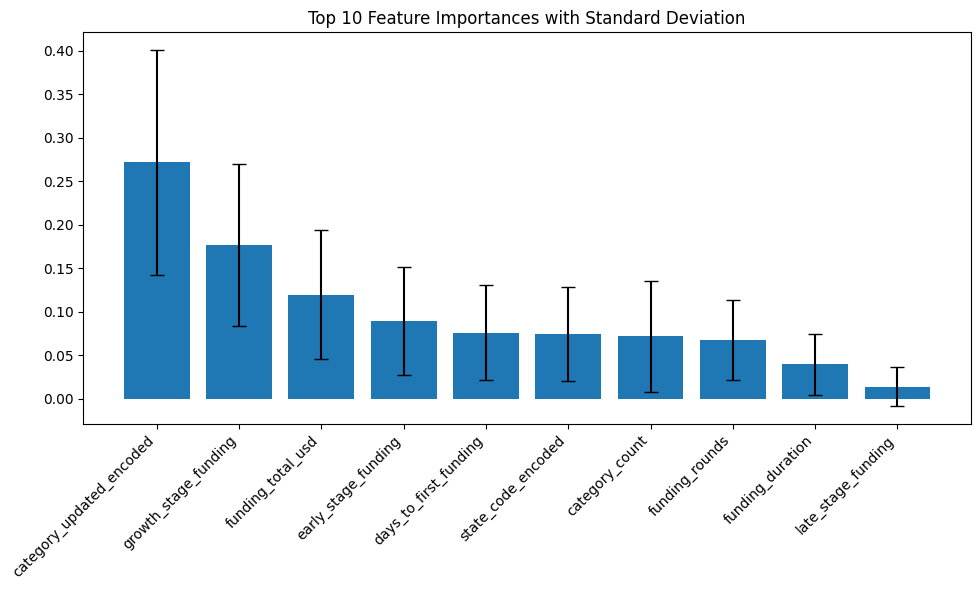

In [ ]:
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           precision_recall_curve, auc, roc_curve, precision_score,
                           recall_score, f1_score)
from sklearn.model_selection import RandomizedSearchCV, cross_validate, StratifiedKFold


smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', {0: 5, 1: 1}, {0: 7, 1: 1}, {0: 10, 1: 1}]
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='precision',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Training model...")
rf_random.fit(X_train_balanced, y_train_balanced)

best_rf = rf_random.best_estimator_
print("\nBest parameters:", rf_random.best_params_)

print("\nPerforming cross-validation on best model...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

cv_results = cross_validate(
    best_rf,
    X_train_balanced,
    y_train_balanced,
    cv=skf,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print("\nCross-Validation Results:")
print("-" * 50)
for metric in scoring.keys():
    train_scores = cv_results[f'train_{metric}']
    val_scores = cv_results[f'test_{metric}']
    print(f"\n{metric.capitalize()}:")
    print(f"Training - Mean: {train_scores.mean():.3f} (±{train_scores.std()*2:.3f})")
    print(f"Validation - Mean: {val_scores.mean():.3f} (±{val_scores.std()*2:.3f})")

plt.figure(figsize=(10, 6))
for metric in scoring.keys():
    plt.plot(cv_results[f'test_{metric}'], label=f'Validation {metric}')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross-Validation Scores Across Folds')
plt.legend()
plt.grid(True)
plt.show()

y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

print("\nInitial Model Evaluation:")
print("-----------------")
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('\nInitial Classification Report:')
print(classification_report(y_test, y_pred))

thresholds = np.linspace(0.3, 0.9, 20)
threshold_metrics = []

for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred_threshold)
    conf_matrix_pct = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    threshold_metrics.append({
        'threshold': threshold,
        'precision': precision_score(y_test, y_pred_threshold),
        'recall': recall_score(y_test, y_pred_threshold),
        'f1': f1_score(y_test, y_pred_threshold),
        'fp_rate': conf_matrix_pct[0][1] * 100,
        'tp_rate': conf_matrix_pct[1][1] * 100
    })

metrics_df = pd.DataFrame(threshold_metrics)
optimal_threshold = metrics_df[metrics_df['fp_rate'] < 40].iloc[0]['threshold']

y_pred_final = (y_prob >= optimal_threshold).astype(int)

conf_matrix_final = confusion_matrix(y_test, y_pred_final)
conf_matrix_pct_final = conf_matrix_final.astype('float') / conf_matrix_final.sum(axis=1)[:, np.newaxis]

print(f"\nFinal Results (Threshold = {optimal_threshold:.2f}):")
print("-" * 50)
print("\nConfusion Matrix (Counts):")
print(conf_matrix_final)
print("\nConfusion Matrix (Percentages):")
print(f"True Negatives: {conf_matrix_pct_final[0][0]*100:.2f}%")
print(f"False Positives: {conf_matrix_pct_final[0][1]*100:.2f}%")
print(f"False Negatives: {conf_matrix_pct_final[1][0]*100:.2f}%")
print(f"True Positives: {conf_matrix_pct_final[1][1]*100:.2f}%")

print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))

plt.figure(figsize=(12, 6))
plt.plot(metrics_df['threshold'], metrics_df['fp_rate'], label='False Positive Rate')
plt.plot(metrics_df['threshold'], metrics_df['recall'] * 100, label='Recall')
plt.plot(metrics_df['threshold'], metrics_df['precision'] * 100, label='Precision')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label='Optimal Threshold')
plt.xlabel('Classification Threshold')
plt.ylabel('Percentage')
plt.title('Metrics vs Classification Threshold')
plt.legend()
plt.grid(True)
plt.show()

importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_], axis=0)

feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances,
    'Std': std
}).sort_values(by='Importance', ascending=False)

plot_feature_importance(feature_importance_df)

## Use RandomOverSampler and RandomUnderSampler from the imbalanced-learn (imblearn) library to create two variations of the training data alongside the original dataset.

Original training set distribution:
is_operating
1    8235
0    1609
Name: count, dtype: int64

After oversampling distribution:
is_operating
1    8235
0    8235
Name: count, dtype: int64

After undersampling distribution:
is_operating
0    1609
1    1609
Name: count, dtype: int64

Original Model Results:
              precision    recall  f1-score   support

           0       0.41      0.03      0.06       403
           1       0.84      0.99      0.91      2059

    accuracy                           0.83      2462
   macro avg       0.63      0.51      0.48      2462
weighted avg       0.77      0.83      0.77      2462


Oversampling Results:
              precision    recall  f1-score   support

           0       0.32      0.39      0.35       403
           1       0.88      0.84      0.86      2059

    accuracy                           0.77      2462
   macro avg       0.60      0.61      0.60      2462
weighted avg       0.78      0.77      0.77      2462


Undersampling R

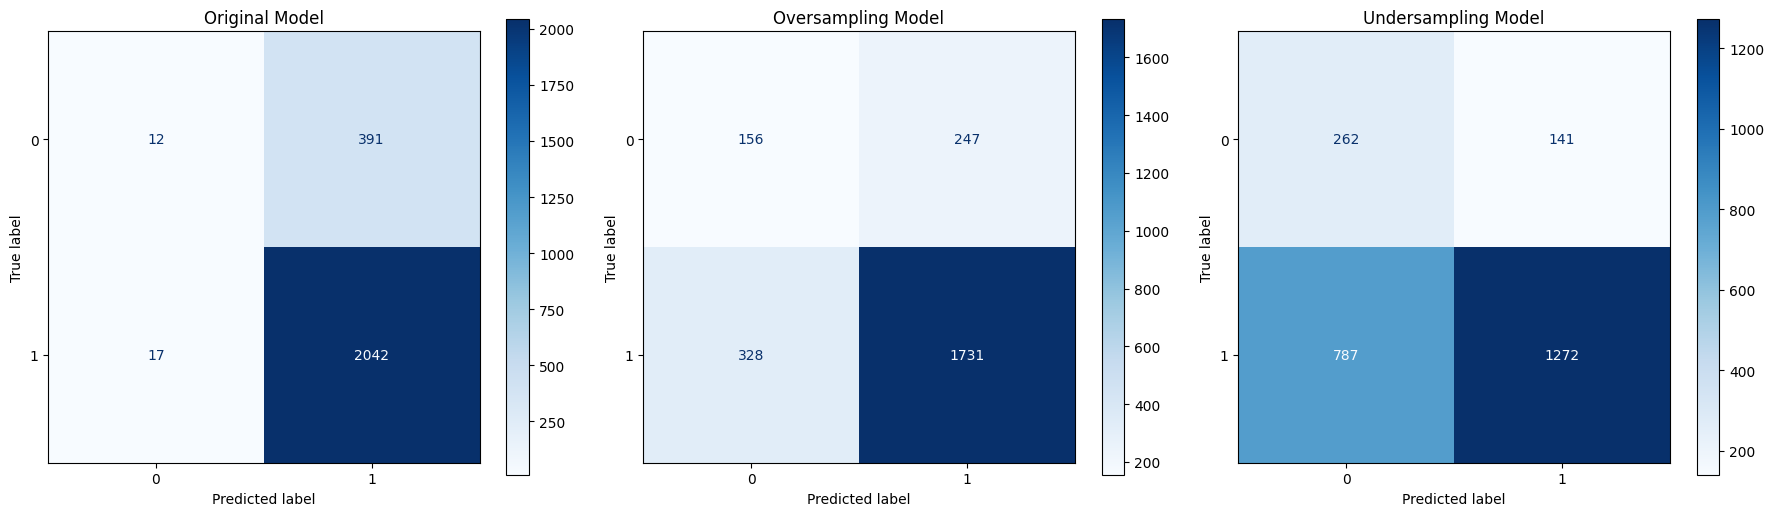

<Figure size 1000x800 with 0 Axes>

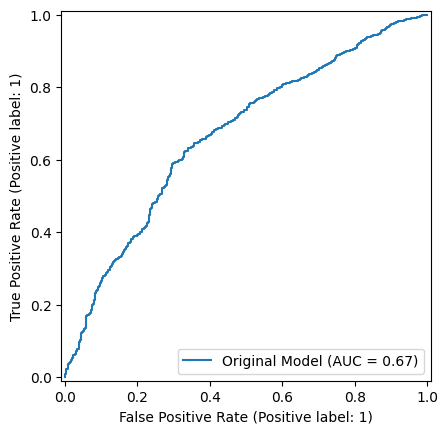

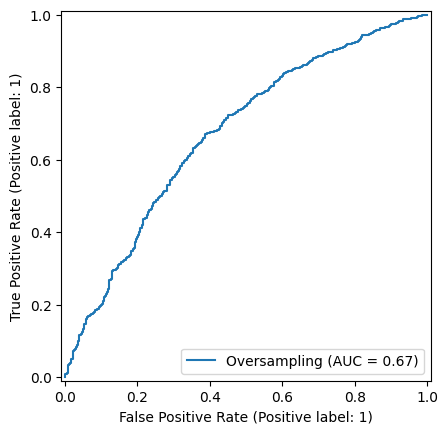

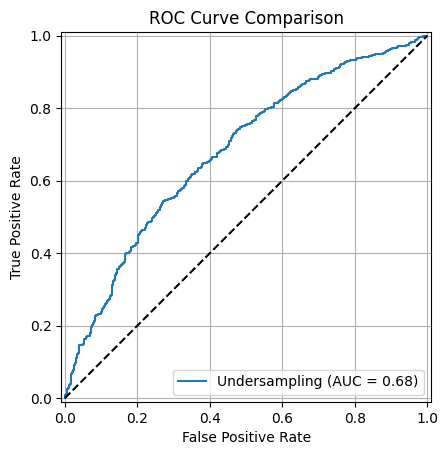


Feature Importances Comparison:
                    Feature  Importance_Original  Importance_Oversampling  \
2     days_to_first_funding             0.201592                 0.197668   
0         funding_total_usd             0.175394                 0.176755   
3          funding_duration             0.120587                 0.105160   
5      growth_stage_funding             0.112754                 0.101196   
8  category_updated_encoded             0.082892                 0.105200   
4       early_stage_funding             0.082329                 0.089315   
9        state_code_encoded             0.080157                 0.090097   
7            category_count             0.067822                 0.068120   
1            funding_rounds             0.042310                 0.041257   
6        late_stage_funding             0.034165                 0.025232   

   Importance_Undersampling  
2                  0.181360  
0                  0.177986  
3                  0.104140  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Use the same feature engineering as before
X = df_processed[feature_columns]
y = df_processed['is_operating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print original distribution
print("Original training set distribution:")
print(pd.Series(y_train).value_counts())

# 1. Original Model (for comparison)
rf_original = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)
y_pred_proba_original = rf_original.predict_proba(X_test)

# 2. Oversampling
oversample = RandomOverSampler(random_state=42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
print("\nAfter oversampling distribution:")
print(pd.Series(y_over).value_counts())

rf_over = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf_over.fit(X_over, y_over)
y_pred_over = rf_over.predict(X_test)
y_pred_proba_over = rf_over.predict_proba(X_test)

# 3. Undersampling
undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X_train, y_train)
print("\nAfter undersampling distribution:")
print(pd.Series(y_under).value_counts())

rf_under = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf_under.fit(X_under, y_under)
y_pred_under = rf_under.predict(X_test)
y_pred_proba_under = rf_under.predict_proba(X_test)

# Print classification reports
print("\nOriginal Model Results:")
print(classification_report(y_test, y_pred_original))
print("\nOversampling Results:")
print(classification_report(y_test, y_pred_over))
print("\nUndersampling Results:")
print(classification_report(y_test, y_pred_under))

# Plot confusion matrices using ConfusionMatrixDisplay
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

titles = ['Original Model', 'Oversampling Model', 'Undersampling Model']
predictions = [y_pred_original, y_pred_over, y_pred_under]

for ax, y_pred, title in zip(axes, predictions, titles):
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        ax=ax,
        cmap='Blues',
        values_format='d'
    )
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Plot ROC curves using RocCurveDisplay
plt.figure(figsize=(10, 8))

# Plot ROC curves for all models
RocCurveDisplay.from_predictions(
    y_test,
    y_pred_proba_original[:, 1],
    name='Original Model'
)
RocCurveDisplay.from_predictions(
    y_test,
    y_pred_proba_over[:, 1],
    name='Oversampling'
)
RocCurveDisplay.from_predictions(
    y_test,
    y_pred_proba_under[:, 1],
    name='Undersampling'
)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Compare feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance_Original': rf_original.feature_importances_,
    'Importance_Oversampling': rf_over.feature_importances_,
    'Importance_Undersampling': rf_under.feature_importances_
})
print("\nFeature Importances Comparison:")
print(feature_importance_df.sort_values('Importance_Original', ascending=False))